In [1]:
#%%sh
!pip install pandas

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.listdir(os.path.join('gdrive', 'My Drive', 'LogisticRegression', 'data', 'category'))

['id_video_games.txt',
 'id_video_sport.txt',
 'id_video_title_lifestyle.txt',
 'id_video_tech.txt',
 'id_video_politics.txt']

In [3]:
data_dir = os.path.join('gdrive', 'My Drive', 'LogisticRegression', 'data', 'category')
sport_f = os.path.join(data_dir, 'id_video_sport.txt')
tech_f = os.path.join(data_dir, 'id_video_tech.txt')
politics_f = os.path.join(data_dir, 'id_video_politics.txt')
games_f = os.path.join(data_dir, 'id_video_games.txt')
lifestyle_f = os.path.join(data_dir, 'id_video_title_lifestyle.txt')

# Read texts into list
def read_lines(filepath):
    with open(filepath) as fp:
        content = fp.readlines()
        content = [x.strip() for x in content]
    return content
  
 
sport = read_lines(sport_f)
tech = read_lines(tech_f)
politics = read_lines(politics_f)
games = read_lines(games_f)
lifestyle = read_lines(lifestyle_f)

data = {'tech': tech, 'politics': politics, 'games': games, 'lifestyle': lifestyle}

print('data size: {}, {}, {}, {}, {}'.format(len(sport), len(tech), len(politics), len(games), len(lifestyle)))

data size: 7978, 20794, 31499, 8921, 19768


In [0]:
import pandas as pd
# create a dataframe for all training texts, with their labels
def create_dataframe_with_label(sport, tech, politics, games, lifestyle):
  all = sport + tech + politics + games + lifestyle
  # make label
  label = []
  for _ in sport:
    label.append(1)
  for _ in tech:
    label.append(2)
  for _ in politics:
    label.append(3)
  for _ in games:
    label.append(4)
  for _ in lifestyle:
    label.append(5)
  # create a pandas dataframe using texts and labels
  trainDF = pd.DataFrame()
  trainDF['text'] = all
  trainDF['label'] = label
  return trainDF

In [5]:
data = create_dataframe_with_label(sport, tech, politics, games, lifestyle)
print(data.head(20))

                                                 text  label
0   2016 wtf world taekwondo junior championships ...      1
1   deretan pemain bintang yg di tenggelamkan jose...      1
2                            dovizioso takeover rossi      1
3    top 7 greatest usa olympic basketball teams ever      1
4   tak kunjung di tawari perpanjangan kontrak per...      1
5   kiper filipina nangis ini detik2 kejadian dari...      1
6   respect ucapan semangat banjiri instagram kipe...      1
7   barcelona vs real madrid 1-1 all goals 03/12/2016      1
8   persegres gresik united vs mitra kukar 2-4 all...      1
9   merinding rosi ternyata menggunakan jimat dise...      1
10                   korsel vs brunei darussalam 11 0      1
11  chile vs ecuador 2-1 all goals highlights worl...      1
12  pertama kali tanpa nil semen padang siap hadap...      1
13  konferensi pers dan latihan timnas sebelum mel...      1
14  latihan persib bandung sebelum melawan persiba...      1
15  lucu banget perayaan

In [6]:
print(data.sample(30))

                                                    text  label
76000        wajib tau kapan harus di usg dan manfaatnya      5
46170  satpol pp bersama panwaslu menurunkan atribut ...      3
78636  how to make niqab by yourself cara membuat niq...      5
10258  5 kesalahan fatal pemula ketika merakit pc kom...      2
77449                           cara memanen jamur tiram      5
21401  dji osmo mobile with xiaomi mi5 telaga warna p...      2
58584  pk ahok dinilai sarat muatan politis jelang pe...      3
51858  paslon cagub cawagub jateng ikuti deklarasi ka...      3
62401     mobile legends yun zhao epic comeback 2x speed      4
53000  muhaimin iskandar cak imin dimarahi buya syafi...      3
12301    jack chen penasihat hukum google yang tunanetra      2
16281  cara mengganti atau upgrade twrp langsung lewa...      2
62113    seruuu coba game yu-gi-oh duel links di android      4
11088                  buat facebook tanpa nomor telepon      2
76169        cara budidaya cabai panduan

In [0]:
def load_stop_words():
  # Get the set of stopwords
  stop_words_f = os.path.join('gdrive', 'My Drive', 'LogisticRegression', 'data', 'dicts', 'stop_words.txt')

  flines = read_lines(stop_words_f)
  return set([x.strip() for x in flines])

In [8]:
stop_words = load_stop_words()
print(len(stop_words))

7193


In [0]:
#install beautifulSoup
#!pip install bs4
# For cleansing
from bs4 import BeautifulSoup
import re
# text cleansing function
def raw_to_words(raw_text, stop_words=None):
    # 1. Remove HTML
    text_1 = BeautifulSoup(raw_text).get_text()
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", text_1)
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    
    # 4. Remove stop words
    if stop_words:
        meaningful_words = [w for w in words if not w in stop_words]   
    else:
        meaningful_words = words
    
    # 5. Join the words back into one string separated by space & return
    return(" ".join(meaningful_words))

In [10]:
# check to see how the cleansing function works
print(sport[1])
print(raw_to_words(sport[1], stop_words=stop_words))
print(raw_to_words(sport[1], stop_words=stop_words))

deretan pemain bintang yg di tenggelamkan jose mourinho
deretan pemain bintang tenggelamkan jose mourinho
deretan pemain bintang tenggelamkan jose mourinho


In [11]:
clean_data = data
clean_data['text'] = clean_data['text'].apply(raw_to_words, stop_words=stop_words)
clean_data = clean_data.loc[clean_data['text']!='']
print(clean_data.head())

                                                text  label
0  wtf world taekwondo junior championships male ...      1
1  deretan pemain bintang tenggelamkan jose mourinho      1
2                           dovizioso takeover rossi      1
3     top greatest usa olympic basketball teams ever      1
4  kunjung tawari perpanjangan kontrak persib boa...      1


In [0]:
# Plot
#import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def show_wordcloud(data, stop_words, title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        #max_words=200,
        max_font_size=80,
        width=800,
        height=600,
        ).generate(str(data))
    fig = plt.figure(1, figsize=(8, 6))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

In [13]:
#get samples
sport_samples = clean_data.loc[clean_data['label'] == 1]
tech_samples = clean_data.loc[clean_data['label'] == 2]
politics_samples = clean_data.loc[clean_data['label'] == 3]
games_samples = clean_data.loc[clean_data['label'] == 4]
lifestyle_samples = clean_data.loc[clean_data['label'] == 5]

bigtext_sport = " ".join(list(sport_samples['text']))
print(len(bigtext_sport))
bigtext_tech = " ".join(list(tech_samples['text']))
print(len(bigtext_tech))
bigtext_politics = " ".join(list(politics_samples['text']))
print(len(bigtext_politics))
bigtext_games = " ".join(list(games_samples['text']))
print(len(bigtext_games))
bigtext_lifestyle = " ".join(list(lifestyle_samples['text']))
print(len(bigtext_lifestyle))

387162
872102
1681883
424674
844962


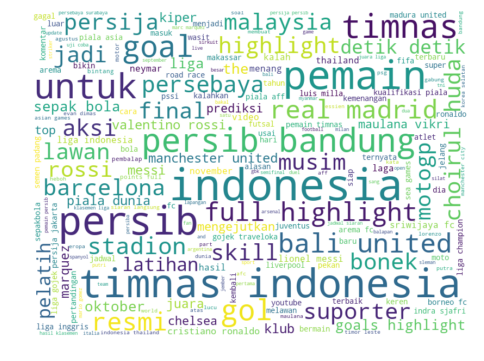

In [14]:
show_wordcloud(bigtext_sport, stop_words)

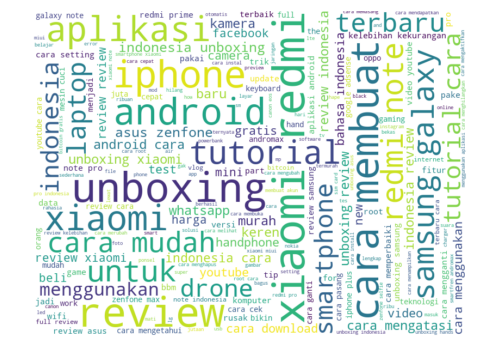

In [15]:
show_wordcloud(bigtext_tech, stop_words)

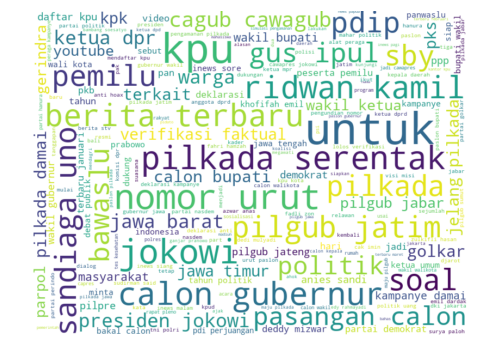

In [16]:
show_wordcloud(bigtext_politics, stop_words)

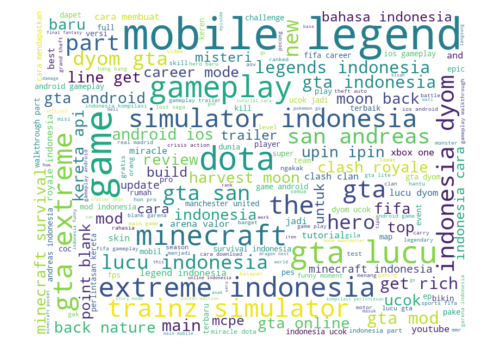

In [17]:
show_wordcloud(bigtext_games, stop_words)

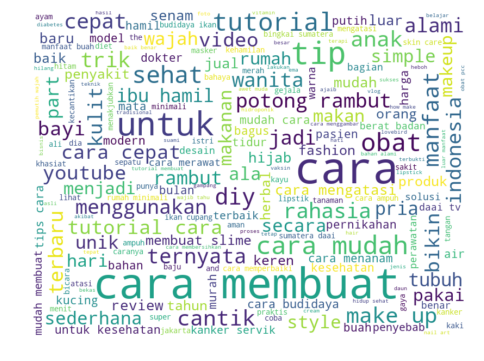

In [18]:
show_wordcloud(bigtext_lifestyle, stop_words)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.model_selection import cross_val_score

In [20]:
# split the dataset into training and validation datasets
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(clean_data['text'], clean_data['label'])
print(len(train_x), len(valid_x))

66720 22240


In [21]:
# create a count vectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(clean_data['text'])
# transform the training and validation data using count vectorizer
xtrain_count = count_vect.transform(train_x)
xvalid_count = count_vect.transform(valid_x)
print(xtrain_count.shape, xvalid_count.shape)

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(clean_data['text'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
print(xtrain_tfidf.shape, xvalid_tfidf.shape)

(66720, 45165) (22240, 45165)
(66720, 45165) (22240, 45165)


In [22]:
#train model
logistic_r = linear_model.LogisticRegression()
logistic_r.fit(xtrain_tfidf, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
# get the predictions
pred_valid = logistic_r.predict(xvalid_tfidf)
print("Validation set")
print("Accuracy:", metrics.accuracy_score(pred_valid, valid_y))
print("Report:\n", metrics.classification_report(valid_y, pred_valid))

Validation set
Accuracy: 0.9593974820143885
Report:
               precision    recall  f1-score   support

           1       0.97      0.88      0.93      1945
           2       0.95      0.95      0.95      5310
           3       0.99      1.00      0.99      7841
           4       0.95      0.91      0.93      2204
           5       0.92      0.97      0.95      4940

   micro avg       0.96      0.96      0.96     22240
   macro avg       0.96      0.94      0.95     22240
weighted avg       0.96      0.96      0.96     22240



In [24]:
#%%
#transform to tfidf and training by naive bayes
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB())])
text_clf.fit(train_x, train_y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [25]:
# try to predict new text
new_title = ['kevin/marcus juarai all england']
pred = text_clf.predict(new_title)
print("Result {}".format(pred))

Result [1]
